In [1]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import utils

warnings.filterwarnings('ignore')

/home/cognam/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data_file = pd.read_excel('data/Sept/IDOLOGY_Qualifiers_total.xlsx')
data_file.drop('QUALIFIERS_NEW=Empty', axis=1, inplace=True)
print(data_file.shape)
samplings = [5, 6, 7, 8]

img_dir = '/home/cognam/Pictures/Ideology_conf/'

(16458, 70)


In [3]:
def train_model(data_train, data_test, clfr, hyper_param, img_prefix):
    for sampling in samplings:
        x_train, y_train = utils.preprocessunEqualDistribution(data_train, sampling)

        print(f' Classifier = {img_prefix} Sampling = {sampling}')

        clf = GridSearchCV(clfr, hyper_param, cv=5, scoring='recall_macro')
        clf.fit(x_train, y_train)
        print(clf.best_params_)
        
        
        x_test = data_test.drop('Label', axis=1)
        y_test = data_test['Label']
        
        y_pred = clf.predict(x_test)

        conf = confusion_matrix(y_test, y_pred)
        sns.heatmap(conf, annot=True, cmap="Greens", fmt='g', cbar_kws={'label': f'{img_prefix} sampling = {sampling}'}
                   , xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
        file_name = img_dir + img_prefix + '_' + str(sampling) + '.png'
#         plt.savefig(file_name, dpi=600)
        plt.show()


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, SparsePCA

pipe = Pipeline(steps=[('pca', PCA()),
                 ('tree', RandomForestClassifier())])

# data_train, data_test = train_test_split(data_file, test_size=0.3, random_state=45)
data_train = 

rf_param = [{'tree__max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
             'pca__n_components': [10, 12, 14, 16, 18, 20, 22, 24, 26]}]
train_model(data_train, data_test, pipe, rf_param, 'RandomForestPCA')

 Classifier = RandomForestPCA Sampling = 5


KeyboardInterrupt: 

 Classifier = LogisticRegressionPCA Sampling = 5
{'lr__C': 10, 'lr__solver': 'newton-cg', 'pca__n_components': 12}


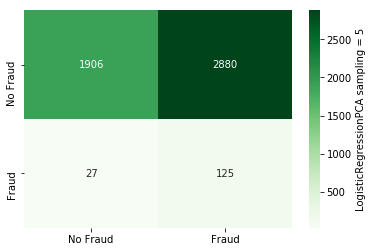

 Classifier = LogisticRegressionPCA Sampling = 6
{'lr__C': 1, 'lr__solver': 'newton-cg', 'pca__n_components': 26}


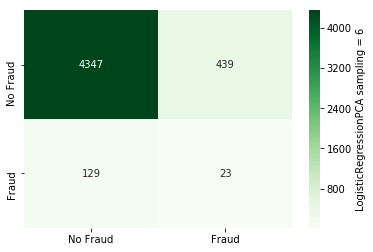

 Classifier = LogisticRegressionPCA Sampling = 7
{'lr__C': 10, 'lr__solver': 'newton-cg', 'pca__n_components': 18}


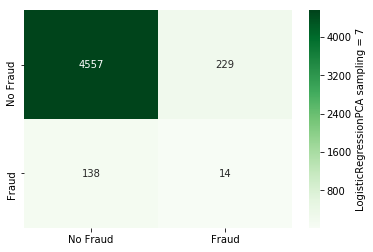

 Classifier = LogisticRegressionPCA Sampling = 8
{'lr__C': 10, 'lr__solver': 'newton-cg', 'pca__n_components': 26}


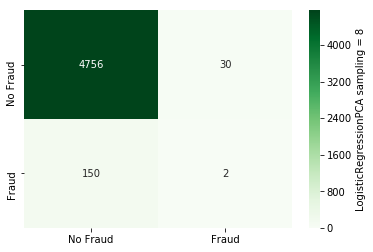

In [21]:
from sklearn.linear_model import LogisticRegression
import numpy as np

pipe = Pipeline(steps=[('pca', PCA()),
                 ('lr', LogisticRegression())])

data_train, data_test = train_test_split(data_file, test_size=0.3, random_state=45)

rf_param = [{'lr__C' : [0.01, 0.1, 1, 10, 100] , 
             'lr__solver' : ['newton-cg', 'lbfgs','liblinear','sag','saga'], 
             'pca__n_components': [10, 12, 14, 16, 18, 20, 22, 24, 26]}]
train_model(data_train, data_test, pipe, rf_param, 'LogisticRegressionPCA')